In [1]:
!pwd

/home/claire/Works/CHIC-plots


In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.cm as cmx
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import collections
import six
import random
import pickle
import matplotlib.gridspec as gridspec

# Set local path for figures 
figpath='/home/claire/Works/CHIC-plots/figures/' # claire laptop
# figpath='/home/cmg76/Works/CHIC-plots/figures/' # claire bullard

# Set local path for data
path = '/home/claire/Works/outgassing-manuscript/Results_Extrusive_Final/' # claire laptop
# path = '/space/cmg76/outgassing paper/Results_Extrusive_Final/' # claire bullard

In [2]:
# Test print some resuls

all_results = pd.read_csv(path+'NiNiO-Vol1/all_results.txt', sep='\s+', index_col=0)
all_results

,Rp(km),Rc(km),Ra,P_atm(bar),P_H2,P_H2O,P_CO,P_CO2,mu_av,M_tot(kg),...,M_H2O,M_CO,M_CO2,H2_mole_frac_av,H2O_mole_frac_av,CO_mole_frac_av,CO2_mole_frac_av,X_H2O_melt,X_CO2_melt,Degassing_eff
Case:,,,,,,,,,,,,,,,,,,,,,
Case10_wet--1.5M--RC0532_FS0.5_MS0.5--NiNiO--22CO2--150H2O:,7.229958e+06,5.329100e+05,1.443361e+09,23.392937,0.262133,19.733175,0.201905,3.195724,18.710028,1.397400e+20,...,1.214700e+20,6.992900e+17,1.739000e+19,0.011085,0.834474,0.003841,0.060801,499.462732,75.026943,0.966492
Case10_wet--1.5M--RC0809_FS0.5_MS1.0--NiNiO--22CO2--150H2O:,7.279715e+06,8.098849e+05,1.304979e+09,22.661083,0.257612,19.392843,0.178908,2.831721,20.820028,1.389800e+20,...,1.207200e+20,6.989400e+17,1.738200e+19,0.012120,0.912356,0.004346,0.068791,558.896112,84.437888,0.961372
Case10_wet--1.5M--RC1871_FS0.5_MS1.5--NiNiO--22CO2--150H2O:,7.292330e+06,1.871089e+06,7.626584e+08,20.030536,0.218382,16.439629,0.200414,3.172112,20.000659,1.242300e+20,...,1.067900e+20,6.677700e+17,1.660700e+19,0.010724,0.807307,0.005523,0.087414,437.658386,71.406918,0.896694
Case10_wet--1.5M--RC1898_FS1.0_MS1.5--NiNiO--22CO2--150H2O:,7.282518e+06,1.898558e+06,7.497781e+08,19.963216,0.225686,16.989508,0.163302,2.584720,19.361557,1.218200e+20,...,1.041100e+20,6.784800e+17,1.687300e+19,0.012091,0.910229,0.003397,0.053762,386.810207,65.776270,0.866334
Case10_wet--1.5M--RC2010_FS1.0_MS0.5--NiNiO--22CO2--150H2O:,7.248179e+06,2.010451e+06,7.127101e+08,24.268237,0.278412,20.958697,0.180126,2.851002,18.756168,1.395700e+20,...,1.208900e+20,7.152000e+17,1.778600e+19,0.012172,0.916333,0.003140,0.049703,561.517963,86.684677,0.942983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Case9_Visc10--8M--RC5638_FS1.0_MS1.0--NiNiO--22CO2--150H2O:,1.116436e+07,5.638929e+06,6.656980e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Case9_Visc10--8M--RC5775_FS1.0_MS0.5--NiNiO--22CO2--150H2O:,1.086948e+07,5.775508e+06,4.882885e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Case9_Visc10--8M--RC5922_FS1.5_MS1.5--NiNiO--22CO2--150H2O:,1.097368e+07,5.922730e+06,5.293423e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
def colorize(vector,cmap='plasma', vmin=None, vmax=None):
    """Convert a vector to RGBA colors. @author: jlustigy

    Parameters
    ----------
    vector : array
        Array of values to be represented by relative colors     
    cmap : str (optional)
        Matplotlib Colormap name
    vmin : float (optional)
        Minimum value for color normalization. Defaults to np.min(vector)
    vmax : float (optional)
        Maximum value for color normalization. Defaults to np.max(vector)
        
    Returns
    -------
    vcolors : np.ndarray
        Array of RGBA colors
    scalarmap : matplotlib.cm.ScalarMappable
        ScalerMap to convert values to colors
    cNorm : matplotlib.colors.Normalize
        Color normalization
    """
    
    if vmin is None: vmin = np.min(vector)
    if vmax is None: vmax = np.max(vector)    
    
    cm = plt.get_cmap(cmap)
    cNorm  = mcolors.Normalize(vmin=vmin, vmax=vmax)
    scalarmap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    vcolors = scalarmap.to_rgba(vector)
    
    return vcolors,scalarmap,cNorm

In [4]:
def read_output(var, buffer='QFM', CO2_0='*', H2O_0='*', M='*', RC='*', FS='*', MS='*', case='*', s=None, 
                getradius=False, getRC=False, append_to_time=None, append_to_H=None, 
                verbose=False, islist=False):
    """Get results for a single parameter.

    Parameters
    ----------
    var : str 
        Name of parameter to extract from data tables
    buffer : str (optional)
        Redox buffer acronym, e.g. 'QFM'   
    CO2_0 : string or int (optional)
        Limit results to this value for initial mantle co2, default all 
    H2O_0 : string or int (optional)
        Limit results to this value for initial mantle h2o, default all
    M : string or int (optional)
        Limit results to this value for planet mass, default all
    RC : string or int (optional)
        Limit results to this value for core radius, default all
    FS : string or int (optional)
        Limit results to this value for Fe/Si ratio, default all
    MS : string or int (optional)
        Limit results to this value for Mg/Si ratio, default all
    case : string or int (optional)
        Limit results to this value for case, default all
    s : str (optional)
        String identifier of specific run 
    getradius : boolean (optional)
        Return radii of planets, default False
    getRC : boolean (optional)
        Return core radii of planets, default False
    append_to_H : list (optional)
        Append var results to this list
    append_to_time : list (optional)
        Append times to this list
        
    Returns
    -------
    append_to_time : list
        Time values in Gyr
    append_to_H : list
        Time-evolution of var, across runs
    radii : list (optional)
        Either planet radii or core radii, across runs
    """
    radii=[]  
    couldntstack=0  
    if (islist) and (append_to_time is None):
        append_to_time = []
        append_to_H = []
    if s is None:
        s = buffer+"*/Case"+str(case)+"_*--"+str(M)+"M--RC"+str(RC)+"_FS"+str(FS)+"_MS"+str(MS)+"--"+buffer+"--"+str(CO2_0)+"CO2--"+str(H2O_0)+"H2O.txt"
    else:
        s = '*/'+s
    
    for ii, infile in enumerate(glob.glob(os.path.join(path,s))):

        temp = pd.read_csv(infile, sep='\s+', header=0, usecols=['time(Gyr)',var])
        if getradius:
            first = os.path.dirname(infile)
            all_results = pd.read_csv(first+'/all_results.txt', sep='\s+', index_col=0, 
                                      usecols=['Case:','Rp(km)'])
            case = str(os.path.basename(infile))[:-4]+':' # remove .txt
            R = all_results.loc[case, 'Rp(km)']

        elif getRC:
            first = os.path.dirname(infile)
            all_results = pd.read_csv(first+'/all_results.txt', sep='\s+', index_col=0, 
                                      usecols=['Case:','Rc(km)'])
            case = str(os.path.basename(infile))[:-4]+':' # remove .txt
            R = all_results.loc[case, 'Rc(km)']
        else:
            R = -1

        # extract parameter and time data from dataframe
        H = temp.loc[:, var].values
        time = temp.loc[:, 'time(Gyr)'].values

        # store only if simulation reached 4.5 Gyr
        if time[-1] >= 4.5:
            radii.append(R)
            if append_to_time is not None:
                if islist:
                    append_to_time.append(time)
                    append_to_H.append(H)
                elif append_to_time[0].all()==time.all():
                    try:
                        append_to_time = np.vstack((append_to_time, time.T))
                        append_to_H = np.vstack((append_to_H, H.T))
                    except ValueError:
                        couldntstack+=1
                        if verbose:
                            print('couldnt stack', os.path.basename(infile), 'due to size mismatch')
                else:
                    if verbose:
                        print('error: times do not align', np.shape(time))
            else:
                append_to_time = np.array(time).T
                append_to_H = np.array(H).T
        else:
            if verbose:
                print(os.path.basename(infile), 'incomplete')
    if verbose:
        print('Couldnt stack', couldntstack, 'cases')
        
    if getradius or getRC:
        # return extra variable
        return append_to_time, append_to_H, radii
    return append_to_time, append_to_H

In [5]:
def read_final_output(var, buffer, CO2_0='*', H2O_0='*', M='*', RC='*', FS='*', MS='*', 
                      case='*', s=None, append_to=None, verbose=False):
    """Get results at final time-step for a single parameter.

    Parameters
    ----------
    var : str 
        Name of parameter to extract from data tables
    buffer : str (optional)
        Redox buffer acronym, e.g. 'QFM'   
    CO2_0 : str or int (optional)
        Limit results to this value for initial mantle co2, default all 
    H2O_0 : str or int (optional)
        Limit results to this value for initial mantle h2o, default all
    M : str or int (optional)
        Limit results to this value for planet mass, default all
    RC : str or int (optional)
        Limit results to this value for core radius, default all
    FS : str or int (optional)
        Limit results to this value for Fe/Si ratio, default all
    MS : str or int (optional)
        Limit results to this value for Mg/Si ratio, default all
    case : string or int (optional)
        Limit results to this value for case, default all
    s : str (optional)
        String identifier of specific run 
    append_to : list (optional)
        Append var results to this list
        
    Returns
    -------
    out : list
        Final value of var, across runs
    """
    if append_to is None:
        out = [] 
    else:
        out = append_to
    if s is None:
        s = buffer+"*/Case"+str(case)+"_*--"+str(M)+"M--RC"+str(RC)+"_FS"+str(FS)+"_MS"+str(MS)+"--"+buffer+"--"+str(CO2_0)+"CO2--"+str(H2O_0)+"H2O.txt"
    else:
        s = '*/'+s
    
    
    for ii, infile in enumerate(glob.glob(os.path.join(path,s))):
        

        temp = pd.read_csv(infile, sep='\s+', header=0, usecols=[0], index_col=False)
        time = temp.loc[:, 'time(Gyr)'].values
        if time[-1] >= 4.5:
            first = os.path.dirname(infile)
            all_results = pd.read_csv(first+'/all_results.txt', sep='\s+', header=0, 
                                      index_col=0
                                     )
            case = str(os.path.basename(infile))[:-4]+':' # remove .txt

            this_out = all_results.loc[case, var]
            out.append(this_out)

        elif verbose:
            print(os.path.basename(infile), 'incomplete')
      
    return out

In [6]:
def ts_percentiles(a, ax=None, test_gauss=True, islist=False):  
    """Get percentiles of a variable across time steps
    
    Parameters
    ----------
    a : array
        variable to process, 2D array with shape (n_runs, n_timesteps)   
    ax : axes (optional)
        The axes to plot on (if test_gauss=True)
    test_gauss : (optional)
        If true, plot distribution of data to check if it's Gaussian
        
    Returns
    -------
    q : array
        The percentiles
    """
    if test_gauss:
        c = 'xkcd:black'
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
        try:
            tf = a[:,-1]
        except TypeError:
            tf = a[0]
            
        ax.hist(tf, bins=20, color=c, histtype='stepfilled')
        ax.set_title('does this look gaussian?')

    if islist:
        q = []
        for ii, ai in enumerate(a): # do each mass set individually
            q_i = np.percentile(ai, q=[16, 50, 84], axis=0)
            q.append(q_i)
        q = np.array(q).T
        
    else:
        q = np.percentile(a, q=[16, 50, 84], axis=0)
        
    return q

In [7]:
def plot_1sigma_evol(t, a, fig=None, ax=None, color=None, test_gauss=False, xlim=(0, 4.5), zorder=1,
                     label='', title='', xlabel='', ylabel='', leg=True, legtitle='', showmedian=True,
                     legsize=12, axissize=14, ticksize=10, ylim=None, ls='-', hatch=None, y2label=None,
                     legloc='upper right', islist=False, lw=3, alpha=0.3, sigma=1, showy=True, text=None,
                     ylabelpad=10, xticks=None, showx=True, showtit=True):
    """General function to make 1-sigma plots
    
    Parameters
    ----------
    t : array
        Time values for x-axis
    a : array
        Values of parameter to plot on y-axis
    test_gauss : boolean (optional)
        test_gauss in function ts_percentiles
    xlim : tuple (optional)
        x-axis limits
    showmedian : boolean (optional)
        Mark 50th percentile with line
    sigma: int (optional)
        Sigma value for error; -1 = don't show error
    showy : boolean (optional)
        Show/hide y ticks
    text : str (optional)
        Annotation text'
                   
    Returns
    -------
    fig : obj
        The figure object
    ax : obj
        The axis object
    """
    # get percentiles at each time step
    lower, med, upper = ts_percentiles(a, test_gauss=test_gauss, islist=islist)
    
    if color is None:
        color='xkcd:black'
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    if showmedian:
        ax.plot(t, med, lw=lw, color=color, label=label, ls=ls)
        label=None
    if sigma==-1:
        # show min, max instead of sigma variation
        a_max = [np.max(x) for x in a]
        a_min = [np.min(x) for x in a]
        ax.fill_between(x=t, y1=a_max, y2=a_min, alpha=alpha, color=color, hatch=hatch, label=label, zorder=zorder)
    elif sigma>0:
        ax.fill_between(x=t, y1=upper, y2=lower, alpha=alpha, color=color, hatch=hatch, label=label, zorder=zorder)
    
    if text is not None:
        ax.text(t[-50], med[-50]-0.2, s=text, fontsize=legsize, va='top', ha='right', color=color)
    
    ax.set_xlabel(xlabel, fontsize=axissize)
    if showy:
        ax.set_ylabel(ylabel, fontsize=axissize, labelpad=ylabelpad)

    if not showtit:
        ax.set_title(title, fontsize=axissize, c='w')
    else:
        ax.set_title(title, fontsize=axissize)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    if xticks is not None:
        ax.set_xticks(xticks)
    if not showx:
        ax.get_xaxis().set_visible(False)
    if not showy:
        ax.get_yaxis().set_visible(False)
    
    if leg:
        legend = ax.legend(frameon=False, title=legtitle, loc=legloc, fontsize=legsize)
        if legtitle is not None:
            plt.setp(legend.get_title(),fontsize=legsize)
    ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)
    
    return fig, ax

In [8]:
def plot_thickness_mass(masses, CO2_0='*', H2O_0='*', fig=None, ax=None, title='', legsize=14,
                        axissize=18, ticksize=16,
                        xlabel='', ylabelpad=10, showtit=True, ylabel='Atmospheric thickness (km)',
                       test=False, showx=True, showy=True, MS='*', FS='*', sigma=1, leg=True):
    """Plot final atm thickness as a function of mass
    
    Parameters
    ----------
    masses : array
        x-axis values
    CO2_0 : array (optional)
        Limit results to this value for initial mantle co2, default all 
    H2O_0 : array (optional)
        Limit results to this value for initial mantle h2o, default all
    MS : str (optional)
        Limit results to this value for initial mantle Mg/Si ratio, default all 
    FS : str (optional)
        Limit results to this value for initial mantle Fe/Si ratio, default all
    test : boolean (optional)
        test_gauss in function ts_percentiles, default False
    showy : boolean (optional)
        Show/hide y ticks
    sigma : int (optional)
        Sigma value to plot for error
    fig : obj (optional)
        Matplotlib figure object to plot on
    ax : obj (optional)
        Matplotlib axis object to plot on
    title : str (optional)
        Plot title text
        
    Returns
    -------
    fig : obj
        The figure object
    ax : obj
        The axis object
    """
    a_reduced = []
    a_oxidized = []
    var='d_atm(km)'
    
    for ii, mass in enumerate(masses):
        t_reduced, H_reduced = read_output(var, buffer='IW', M=mass, CO2_0=CO2_0, H2O_0=H2O_0,
                                          islist=True, MS=MS, FS=FS) # reduced
#         t_reduced, H_reduced = read_output(var, buffer='QIF', M=mass, CO2_0=CO2_0, H2O_0=H2O_0, 
#                                           append_to_time=t_reduced, append_to_H=H_reduced, 
#                                           islist=True, MS=MS, FS=FS) # reduced
        t_oxidized, H_oxidized = read_output(var, buffer='NiNiO', M=mass, CO2_0=CO2_0, H2O_0=H2O_0, 
                                            islist=True, MS=MS, FS=FS) # oxidized
#         t_oxidized, H_oxidized = read_output(var, buffer='QFM', M=mass, CO2_0=CO2_0, H2O_0=H2O_0,
#                                             islist=True, MS=MS, FS=FS,
#                                             append_to_time=t_oxidized, append_to_H=H_oxidized) # oxidized

        # take slice of final timestep
        try:
            Hf_reduced = H_reduced[:, -1]
            Hf_oxidized = H_oxidized[:, -1]
        except TypeError:
            Hf_reduced = [el[-1] for el in H_reduced]
            Hf_oxidized = [el[-1] for el in H_oxidized]
        a_reduced.append(Hf_reduced)
        a_oxidized.append(Hf_oxidized)

    fig, ax = plot_1sigma_evol(masses, a_reduced, islist=True, xlim=(np.min(masses), np.max(masses)), 
                               color='xkcd:black', sigma=sigma, 
                               legtitle=r'$\bf{Redox \; buffer}$', leg=leg,
                               ls='--', alpha=0.2,
                               xlabel=xlabel, legloc='upper right',
                               label='Reduced mantle', 
                               fig=fig, ax=ax, axissize=axissize, legsize=legsize, ticksize=ticksize, 
                               test_gauss=test, showx=showx, showy=showy, ylabelpad=ylabelpad)
    fig, ax = plot_1sigma_evol(masses, a_oxidized, islist=True, xlim=(np.min(masses), np.max(masses)),
                               color='xkcd:seaweed', sigma=sigma, 
                               legtitle=r'$\bf{Redox \; buffer}$', leg=leg,
                               xlabel=xlabel, legloc='upper right',
                               label='Oxidized mantle', ylabel=ylabel,
                               title=title, 
                               alpha=0.2,
                               axissize=axissize, legsize=legsize, ticksize=ticksize, ylim=[0, 300], #ylim=[0, 0.04], 
                               fig=fig, ax=ax, showtit=showtit,
                               test_gauss=test, showx=showx, showy=showy, ylabelpad=ylabelpad)
    return fig, ax

In [9]:
def plot_partialpressures_mass(masses, CO2_0=['*'], H2O_0=['*'], which='pressure', fig=None, 
                               col_offset=None, axes=None, labelpad=10, spec=None,
                               ylim=None, zorder_r=None, zorder_o=None, picklefrom=None,
                               pickleto=None, lw=2, alpha=0.5, legsize=14, axissize=18, ticksize=16):
    """Plot final partial pressures or volatile masses as a function of mass
    WARNING: long runtime
    
    Parameters
    ----------
    masses : array
        x-axis values
    CO2_0 : array (optional)
        Limit results to this value for initial mantle co2, default all (wildcard character)
    H2O_0 : array (optional)
        Limit results to this value for initial mantle h2o, default all (wildcard character)
    which : str, "pressure" or "mass"
        Choose which output variable (partial pressure or outgassed mass), defaults to pressure
    zorder_r = array (optional) 
        z-order to plot species, for reduced-cases subplot
    zorder_o = array (optional) 
        z-order to plot species, for oxidized-cases subplot
    lw : int (optional)
        Line width for matplotlib
    alpha : int (optional)
        Alpha value for matplotlib
    legsize : int (optional)
        Font size for legend text
    axissize : int (optional)
        Font size for axis label text
    ticksize : int (optional)
        Font size for tick label text
           
    Returns
    -------
    fig : obj
        The figure object
    ax : obj
        The axis object
    """
    colors = colorize(np.arange(4), cmap='Spectral_r')[0]
    ls = ['-', '--', '-.', ':']
    nrows=len(CO2_0)
    if fig is None:
        fig, axes = plt.subplots(nrows, 2, figsize=(8, 4*nrows))
    if which=='pressure':
        varis = ['P_H2O', 'P_H2', 'P_CO2', 'P_CO']
        ylabel = 'Partial pressure (bar)'
    elif which=='mass':
        varis = ['M_H2O', 'M_H2', 'M_CO2', 'M_CO']
        ylabel = 'Total outgassed mass (kg)'
    labels= ['H$_2$O', 'H$_2$', 'CO$_2$', 'CO']
    hatches=['//', '.', '\\',  '-']
    voltext=[ 'high-volatile cases', 'low-volatile cases', 'dry cases']
    title_r = 'Reduced mantle'
    title_o = 'Oxidized mantle'
    xlabel=''
    if picklefrom is not None: 
        # load figure data
        pp_reduced_masses_all, pp_oxidized_masses_all = pickle.load(open( figpath+'data/'+picklefrom, "rb" ))
        print(np.shape(pp_reduced_masses_all))
        print(np.shape(pp_reduced_masses_all[0]))
    else:
        pp_reduced_masses_all = []
        pp_oxidized_masses_all = []
     
    showx=False
    for row, vol in enumerate(CO2_0):
        for ii, var in enumerate(varis):
            pp_reduced_masses = []
            pp_oxidized_masses = []
            if picklefrom is None:  
                # read in data from raw tables
                for jj, mass in enumerate(masses):
                    pp_reduced = read_final_output(var, 'IW', M=mass, CO2_0=vol, H2O_0=H2O_0[row])
#                     pp_reduced = read_final_output(var, 'QIF', M=mass, CO2_0=vol, H2O_0=H2O_0[row], 
#                                                    append_to=pp_reduced)
                    pp_oxidized = read_final_output(var, 'NiNiO', M=mass, CO2_0=vol, H2O_0=H2O_0[row])
#                     pp_oxidized = read_final_output(var, 'QFM', M=mass, CO2_0=vol, H2O_0=H2O_0[row],
#                                                     append_to=pp_oxidized)

                    pp_reduced_masses.append(pp_reduced)
                    pp_oxidized_masses.append(pp_oxidized)
            else:
                pp_reduced_masses = pp_reduced_masses_all[ii*(row) + ii]
                pp_oxidized_masses = pp_oxidized_masses_all[ii*(row) + ii]
            # plot
            if row==0: # only show legend in top row
                leg=True
            if row>0:
                title_r=''
                title_o=''
                leg=False
            if row==1:
                ylabeli=ylabel
            else:
                ylabeli=''
            if row==nrows-1:
                xlabel='Planet mass ($M_E$)'
                showx=True
            if ylim is not None:
                ylim1 = ylim[row]
            else:
                ylim1 = ylim

            # set zorder by height
            if zorder_r is not None:
                zorder1_r = np.array(zorder_r)[ii,row]
            else:
                zorder1_r = np.array(zorder_r)[ii,row]
            if zorder_o is not None:
                zorder1_o = np.array(zorder_o)[ii,row]
            else:
                zorder1_o = np.array(zorder_o)[ii,row]
                
            if spec is None:    
                ax=axes[row][0+col_offset]
            else:
                ax = fig.add_subplot(spec[row, 0+col_offset])
            fig, ax = plot_1sigma_evol(masses, pp_reduced_masses, islist=True, leg=leg, 
                                       xlim=(np.min(masses), np.max(masses)), showy=True,
                                       lw=lw, alpha=alpha, legsize=legsize, axissize=axissize, 
                                       ticksize=ticksize, color=colors[ii], ls=ls[ii], label=labels[ii], 
                                       fig=fig, ax=ax, ylim=ylim1, xlabel=xlabel,  legloc='upper right',
                                       hatch=hatches[ii], ylabel=ylabeli, title=title_r, showmedian=False, 
                                       zorder=zorder1_r, showx=showx, ylabelpad=labelpad)
            if row < nrows-1:
                plt.yticks([20, 40, 60, 80, 100])
            
            if spec is None:    
                ax=axes[row][1+col_offset]
            else:
                ax = fig.add_subplot(spec[row, 1+col_offset])
            fig, ax = plot_1sigma_evol(masses, pp_oxidized_masses, islist=True, leg=False, 
                                       xlim=(np.min(masses), np.max(masses)), lw=lw, alpha=alpha, 
                                       legsize=legsize, axissize=axissize, ticksize=ticksize,
                                       color=colors[ii], ls=ls[ii], label=labels[ii], fig=fig, ax=ax, 
                                       ylim=ylim1, zorder=zorder1_o, xlabel=xlabel, 
                                       title=title_o, hatch=hatches[ii], 
                                       y2label=voltext[row], showmedian=False, showx=showx, showy=False)
            pp_reduced_masses_all.append(pp_reduced_masses)
            pp_oxidized_masses_all.append(pp_oxidized_masses)
            

            
        ax=ax #axes[row][1+col_offset]
        
        # label volatile case on right side
        ax2 = ax.twinx()  # add row label
        ax2.set_ylabel(voltext[row], fontsize=axissize, color='k', rotation=270, va="bottom")  
        ax2.set_yticks([])

#     if pickleto is not None:
#         pickle.dump((pp_reduced_masses_all, pp_oxidized_masses_all), open(figpath+'data/'+pickleto, "wb"))
    return fig, ax

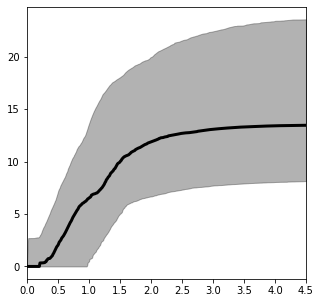

In [14]:
var='P_tot(bar)'
t_reduced, H_reduced = read_output(var, buffer='IW', M=1) # reduced                                
t_oxidized, H_oxidized = read_output(var, buffer='NiNiO', M=1) # oxidized
fig, ax = plot_1sigma_evol(t_reduced[0], H_reduced, 
                           color='k',
                           leg=False,
                           test_gauss=False
                          )

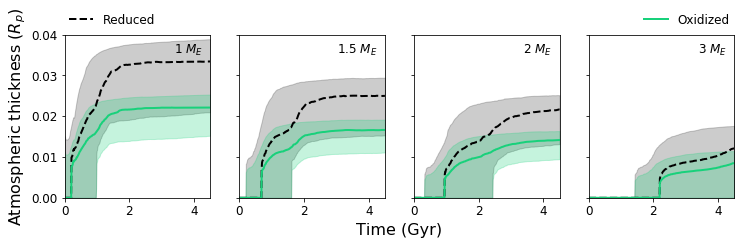

In [21]:
""" this cell makes figure 2 in Scientific Reports manuscript

creates two separate figure images. can insert them both inside a single latex figure environment,
or combine them in an image editor

"""

def subplot_time_evol(var, masses, ncols=2, redcolor='xkcd:black', oxicolor='xkcd:seaweed', lw=2,
                      ylim=[0, 0.04], ylabel="", test=False, draft=False):
    """Plot time-evolution of a given variable in subplots split over mass
    
    Parameters
    ----------
    var : str
        Name of parameter to plot on y-axis, as written in in results tables
    masses : array
        x-axis values
    ncols : int (optional)
        Number of subplot columns
    redcolor : str (optional)
        Matplotlib colour to plot reduced cases
    oxicolor : str (optional)
        Matplotlib colour to plot oxidized cases 
    lw : int (optional)
        Line width for matplotlib
    ylim : array (optional)
        Limits for y-axis
    ylabel : str (optional)
        Text label for y-axis
    test : boolean (optional)
        test_gauss in function percentiles_ts
           
    Returns
    -------
    fig : figure
        The figure object
    """
    nrows=int(np.ceil(len(masses)/ncols))
    fig = plt.figure(figsize=(3*ncols, 3*nrows))
    
    # Set up big subplot to host shared axis labels
    bigax = fig.add_subplot(111)    
    bigax.spines['top'].set_color('none')
    bigax.spines['bottom'].set_color('none')
    bigax.spines['left'].set_color('none')
    bigax.spines['right'].set_color('none')
    bigax.tick_params(labelcolor='w', which='both', bottom=False,  left=False, right=False, top=False)


    # Loop across subplots
    for ii, mass in enumerate(masses):
        
        if ((ii==0) and (draft)) or (not draft):
            z = int(str(nrows) + str(ncols) + str(ii+1))
            ax = fig.add_subplot(z)


            isleg=False
            if ii == np.size(masses)-1:
                isleg=True # Only draw legend upon last iteration

            t_reduced, H_reduced = read_output(var, buffer='IW', M=mass) # reduced
    #         t_reduced, H_reduced = read_output(var, buffer='QIF', M=mass,
    #                                            append_to_time=t_reduced, append_to_H=H_reduced) # reduced
            t_oxidized, H_oxidized = read_output(var, buffer='NiNiO', M=mass) # oxidized
    #         t_oxidized, H_oxidized = read_output(var, buffer='QFM', M=mass,
    #                                            append_to_time=t_oxidized, append_to_H=H_oxidized) # oxidized

            fig, ax = plot_1sigma_evol(t_reduced[0], H_reduced, 
                                       color=redcolor,
                                       alpha=0.2, lw=lw, ls='--',
                                       fig=fig, ax=ax, leg=False,
                                       test_gauss=test
                                      )

            fig, ax = plot_1sigma_evol(t_oxidized[0], H_oxidized, 
                                       color=oxicolor,
                                       legtitle=r'$\bf{Redox \; buffer}$', 
                                       alpha=0.25,lw=lw,
                                       ticksize=12,  ylim=ylim,
                                       fig=fig, ax=ax, leg=False,
                                       test_gauss=test
                                      )
            if isleg:
                # Draw legend on top
                redline = Line2D([0], [0], color=redcolor, linewidth=lw, linestyle='--')
                oxiline = Line2D([0], [0], color=oxicolor, linewidth=lw, linestyle='-')
                lines = [redline, oxiline]
                labels = ['Reduced', 'Oxidized']
                bigax.legend(lines, labels, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", 
                             fontsize=12,
                             frameon=False, borderaxespad=0.)
            if ii%ncols != 0:
                ax.tick_params(labelleft=False)  

            ax.text(0.95, 0.95, str(mass)+' $M_E$', fontsize=12, 
                    ha='right', va='top',
                    transform=ax.transAxes)
    

    bigax.set_xlabel('Time (Gyr)', fontsize=16, labelpad=8)
    bigax.set_ylabel(ylabel, fontsize=16, labelpad=14)
    return fig

masses = [1, 1.5, 2, 3]
fig = subplot_time_evol('d_atm(Rp)', masses, ncols=4, ylabel=r'Atmospheric thickness ($R_p$)', draft=False)
fig.savefig(figpath+'masses_thickness_evol.pdf', bbox_inches='tight')

fig = subplot_time_evol('P_tot(bar)', masses, ncols=4, ylim=[0, 80], ylabel=r'Total outgassed pressure (bar)')
fig.savefig(figpath+'masses_ptot_evol.pdf', bbox_inches='tight')

/home/claire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:118: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/claire/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


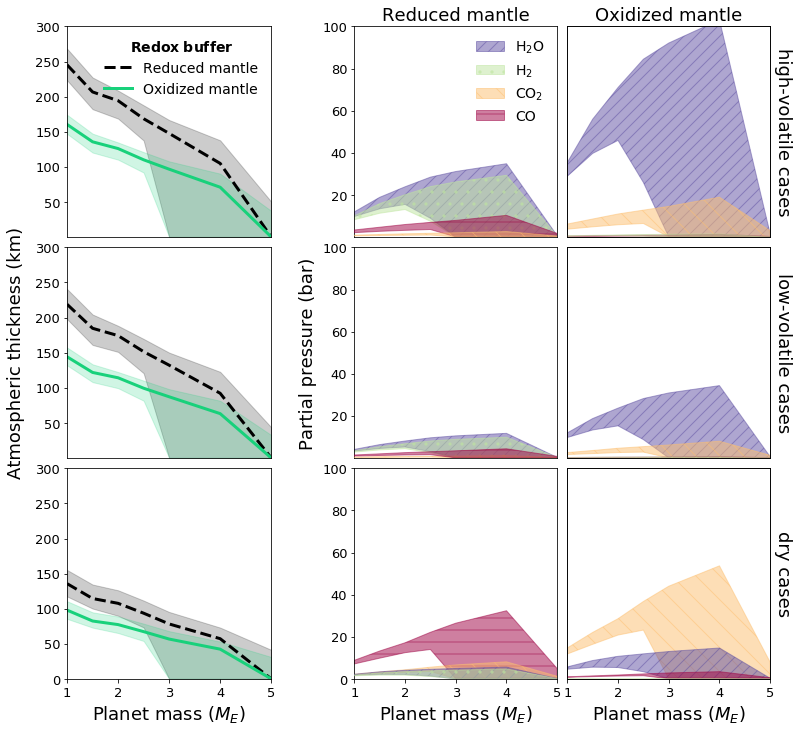

In [24]:
""" this cell makes figure 3 in Scientific Reports manuscript 

may take a while to run (>10 minutes)

"""

X_CO2 = [50, 22, 180]
X_H2O = [450, 150, 50]
masses = [1, 1.5, 2, 2.5, 3, 4, 5]

def fig3_SR(nrows=3, ncols=3, legsize=14, axissize=18, ticksize=16):
    fig = plt.figure(figsize=(10.5, 4*nrows), constrained_layout=False)
    gs1 = fig.add_gridspec(nrows=3, ncols=1, left=0.05, right=0.32,
                           hspace=0.05, wspace=0.1) # thickness
    gs2 = fig.add_gridspec(nrows=3, ncols=2, left=0.43, right=0.98,
                           hspace=0.05, wspace=0.05) # pressure
    
    # first column - thickness
    # loop over volatile cases
    x=False
    y=True
    leg=True
    xlabel=''
    for ii in range(nrows):
        ax = fig.add_subplot(gs1[ii, 0])
        if ii>0:
            leg = False # only show legend in first instance
        if ii==nrows-1:
            xlabel = 'Planet mass ($M_E$)'
            x = True
        if ii==1:
            ylabel = 'Atmospheric thickness (km)'
        else:
            ylabel = ''
        fig, ax = plot_thickness_mass(masses, CO2_0=X_CO2[ii], H2O_0=X_H2O[ii], fig=fig, ax=ax, test=False,
                                      showx=x, showy=y, leg=leg, xlabel=xlabel, ylabelpad=10, ylabel=ylabel,
                                      legsize=legsize, axissize=axissize, ticksize=ticksize)
        if ii < nrows - 1:
            plt.yticks([50, 100, 150, 200, 250, 300])

    # columns 2 and 3 - pressure
    ylim = [[0, 100], [0, 100], [0, 100]]
    zorder_r = [[1, 1, 3],[2, 2, 4],[4, 3, 2],[3, 4, 1]] # by row, species
    zorder_o = [[1, 1, 2], [4, 4, 4], [2, 2, 1], [3, 3, 3]]
    
    fig, ax = plot_partialpressures_mass(masses, X_CO2, X_H2O, which='pressure', ylim=ylim, col_offset=0,
                                         zorder_r=zorder_r, zorder_o=zorder_o, fig=fig, 
                                         spec=gs2, labelpad=5,  
                                         legsize=legsize, axissize=axissize, ticksize=ticksize)
    
    return fig, ax
    
fig, ax = fig3_SR(ticksize=13)
fig.savefig(figpath+'fig3.jpg', bbox_inches='tight', dpi=300)

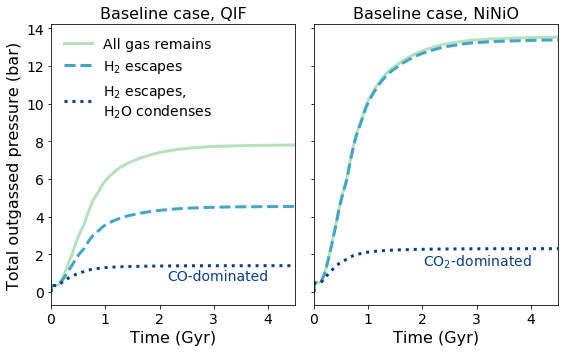

In [28]:
def plot_escape_case(s_case, redoxes=['QIF', 'NiNiO'], CO2_0=22, H2O_0=150): 
    """For one run, plot evolution of gases assuming all H2 escapes, then all water condenses
    
    Parameters
    ----------
    s_case : str
        File name of run but with redox information removed, e.g. 'Case1_Reference--1M--RC0938_FS0.5_MS1.0--'
    redoxes : array (optional)
        Acronyms of redox states, extract these runs from data tables
    CO2_0 : int (optional)
        Initial mantle co2 for this run, default all 
    H2O_0 : int (optional)
        Initial mantle h2o for this run, default all
           
    Returns
    -------
    fig : obj
        The figure object
    ax : obj
        The axis object
    """
    colors=colorize(np.arange(3), cmap='GnBu', vmin=-1)[0]
    fig, axes = plt.subplots(1, np.size(redoxes), sharey=True, figsize=(8, 5))
    leg=True
    ylabel='Total outgassed pressure (bar)'
    text=['CO-dominated', r'CO$_2$-dominated']
    for ii, redox in enumerate(redoxes):
        if ii>0:
            leg=False
            ylabel=''
        s = s_case+redox+'--'+str(CO2_0)+'CO2--'+str(H2O_0)+'H2O.txt'
        t_case1, H2_case1 = read_output(var='P_H2(bar)', s=s, islist=True) 
        t_case1, H2O_case1 = read_output(var='P_H2O', s=s, islist=True) 
        t_case1, CO_case1 = read_output(var='P_CO', s=s, islist=True) 
        t_case1, CO2_case1 = read_output(var='P_CO2', s=s, islist=True) 

        P_tot = np.array(H2_case1) + np.array(H2O_case1) + np.array(CO_case1) + np.array(CO2_case1)
        P_esc = np.array(H2O_case1) + np.array(CO_case1) + np.array(CO2_case1)
        P_esc_condense = np.array(CO_case1) + np.array(CO2_case1)

        fig, axes[ii] = plot_1sigma_evol(t_case1[0], P_tot, color=colors[0], test_gauss=False, 
                                         xlim=(0, 4.5), label='All gas remains',  leg=leg, legtitle='', 
                                         ls='-', islist=False, lw=3, alpha=0, 
                                         fig=fig, ax=axes[ii],sigma=0)

        fig, axes[ii] = plot_1sigma_evol(t_case1[0], P_esc, color=colors[1], test_gauss=False, 
                                         xlim=(0, 4.5),label='H$_2$ escapes', leg=leg, legtitle='', 
                                         ls='--', islist=False, lw=3, alpha=0, 
                                         fig=fig, ax=axes[ii],sigma=0)

        fig, axes[ii] = plot_1sigma_evol(t_case1[0], P_esc_condense, color=colors[2], test_gauss=False, 
                                         xlim=(0, 4.5), label='H$_2$ escapes,\nH$_2$O condenses', 
                                         title='Baseline case, '+redox, xlabel='Time (Gyr)',
                                         ylabel=ylabel, leg=leg, legtitle='', 
                                         axissize=16, legsize=14, ticksize=14, ylim=None,
                                         ls=':',legloc='upper left', islist=False, lw=3, alpha=0, 
                                         fig=fig, ax=axes[ii], sigma=0, text=text[ii])

    plt.tight_layout()
    return fig, ax

s = 'Case1_Reference--1M--RC0938_FS0.5_MS1.0--' # remove redox info
fig, ax = plot_escape_case(s)
fig.savefig(figpath+'escape.pdf', bbox_inches='tight')

In [ ]:
def plot_scatter_all(var, ylabel=None, title='', usemasses=None, baseline=None, showradii=None):
    """Make scatter plot of all runs, some variable vs. mass
    
    Parameters
    ----------
    var : str
        Name of parameter to plot on y-axis, as written in in results tables
    ylabel : str (optional)
        Text for y-axis label
    title : str (optional)
        Text for figure title
    usemasses : list (optional)
        The planet mass selection to plot
    baseline : (optional)
        The case string to plot as the baseline case, use None for no baseline plotting
    showradii : array (optional)
        Radii to overprint  
        
    Returns
    -------
    fig : figure
        The figure object
    """
    if ylabel is None:
        ylabel=var
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    if usemasses is None:
        masses = [1, 1.5, 2, 2.5, 3, 4, 5, 6]
    else:
        masses = usemasses
    buffers=['QIF', 'IW', 'QFM', 'NiNiO']
    colors = ['xkcd:black','xkcd:black','xkcd:seaweed','xkcd:seaweed']
   
    volatiles = [(22, 150), (50, 450), (180, 50)]
    markers_bl=['v', '^', 'X'] # (Vol1, Vol2, Vol3)
    markers=['o', 'o', 'o']

    count = 0
    for ii, buffer in enumerate(buffers):
        print('buffer', buffer)
        for jj, Xini in enumerate(volatiles):            
            for kk, mass in enumerate(masses):
                #y_f_all=[]
                times, y, radii = read_output(var, buffer=buffer, CO2_0=Xini[0], H2O_0=Xini[1],
                                   s=None, M=mass, islist=True, getradius=True)
                # take slice of final timestep
                y_f = [el[-1] for el in y]
                radii_RE = [x/6371e3  for x in radii] # convert to earth radii

                # don't show 0-outgassing cases
                i_good = [i for i, e in enumerate(y_f) if e > 1e-2]
                count = count+len(i_good)
                
                ax.scatter(np.array(radii_RE)[i_good], np.array(y_f)[i_good], c=colors[ii], 
                           marker=markers[jj], s=170,#s=200*(jj+1), 
                           alpha=0.05,edgecolors='k', zorder=1)
            
                if (showradii is not None) and (ii==0) and (jj==0):
                    x1 = showradii[kk][0]
                    x2 = showradii[kk][1]
                    y1 = np.linspace(100, 320, num=len(masses), endpoint=True)[len(masses)-kk-1]
                    ax.plot((x1, x2), (y1, y1), 'k-')
                    ax.text((x1+x2)/2, y1, str(mass)+' $M_E$', fontsize=18, va='bottom', ha='center')
    
    
            if baseline is not None:
                CO2_0=Xini[0]
                H2O_0=Xini[1]
                m=1
                s = 'Case1_Reference--'+str(m)+'M--'+baseline+'--'+buffer+'--'+str(CO2_0)+'CO2--'+str(H2O_0)+'H2O.txt'
                t_bl, y_bl, rad_bl = read_output(var, s=s, islist=True, getradius=True)
                rad_RE = [x/6371e3  for x in rad_bl] # convert to earth radii
                ax.scatter(rad_RE, y_bl[0][-1], c=colors[ii], 
                                   marker=markers_bl[jj], s=250,#s=200*(jj+1), 
                                   alpha=0.9,edgecolors='xkcd:goldenrod', zorder=100)
    
            
    ax.set_xlabel(r'Planet radius ($R_E$)', fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.set_title(title, fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    
    # legend
    handles1=[]
    for ii, buff in enumerate(['Reduced', 'Oxidized']):
        handles1.append(Line2D([0], [0], marker='o', color='w', markersize=15,
                                  markerfacecolor=colors[ii+1], mec='k', alpha=0.8,
                                  label=buff
                                 ))
    legend1 = plt.legend(handles1, ['Reduced', 'Oxidized'], loc=1, frameon=False, fontsize=18) #title='Redox buffer'
    ax.add_artist(legend1)
    #plt.setp(legend1.get_title(),fontsize=18)
    if baseline is not None:
        handles2=[]
        for ii, mark in enumerate(markers_bl):
            handles2.append(Line2D([0], [0], color='w', markersize=15, #markersize=10*(ii+1),
                                      markerfacecolor=colors[-1], marker=mark, mec='goldenrod',
                                      #label=str(ii+1)
                                     ))
        legend2 = plt.legend(handles2, ['Low', 'High', 'Dry'], loc=9, frameon=False, title='Baseline', fontsize=18)
        ax.add_artist(legend2)
        plt.setp(legend2.get_title(),fontsize=18)
    
    print('count=', count)
    return fig

var='d_atm(km)'
ylabel='Atmospheric thickness (km)'
title='All simulations after 4.5 Gyr'
m = [1, 1.5, 2, 2.5, 3,4,5,6,7,8] #[1, 2, 3, 5]
r_ranges = [[0.968, 1.035], [1.072, 1.145], [1.163,1.248], [1.245,1.331], [1.314,1.385],
           [1.406,1.497], [1.479,1.584], [1.550,1.661], [1.631,1.745], [1.683,1.809]]
s = 'RC0938_FS0.5_MS1.0' # remove redox, mass info

fig = plot_scatter_all(var, ylabel, title, usemasses=m, showradii=r_ranges, baseline=None) # baseline=s 
fig.savefig(figpath+'scatter_allresults.pdf', bbox_inches='tight')

In [ ]:
def plot_evol_all(var, ylabel=None, title='', usemasses=None, scale=10, redcolor='xkcd:black', 
                  oxicolor='xkcd:seaweed'):
    """Plot time-evolution of all runs, for given y-axis variable
    
    Parameters
    ----------
    var : str
        Name of parameter to plot on y-axis, as written in in results tables
    usemasses : list (optional)
        The planet mass selection to plot
    ylabel : str (optional)
        Text for y-axis label
    title : str (optional)
        Text for figure title
    scale : int (optional)
        Thin the data by (1:scale)
    redcolor : str (optional)
        Colour to plot reduced cases
    oxicolor : str (optional)
        Colour to plot oxidized cases   
   
    Returns
    -------
    fig : figure
        The figure object
    """
    if ylabel is None:
        ylabel=var
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    if usemasses is None:
        masses = [1, 1.5, 2, 2.5, 3, 4, 5, 6]
    else:
        masses = usemasses
    buffers=['QIF', 'IW', 'QFM', 'NiNiO']
    colors=[redcolor, redcolor, oxicolor, oxicolor]
    count=0
    for ii, buffer in enumerate(buffers):   
        for kk, mass in enumerate(masses):
            n_sims = np.shape(times)[0]
            # randomly select a fraction of simulations
            sub = random.sample(range(n_sims), int(np.floor(n_sims/scale)))
            for q in sub:
                if times[q][-1] >= 4.5:
                    ax.plot(times[q], y[q], c=colors[ii], alpha=0.1)
                    count=count+1
    
    
    ax.set_xlim(0, 4.5)
    ax.set_ylim(0, )
    ax.set_xlabel(r'Time (Gyr)', fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.set_title(title, fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    # legend
    handles1=[]
    for ii in range(2):
        handles1.append(Line2D([0], [0], marker=None, color=colors[ii+1],
                                alpha=0.7, label=['Reduced', 'Oxidized'][ii]
                                 ))
    legend1 = plt.legend(handles1, ['Reduced', 'Oxidized'], loc='upper left', frameon=False, title='Redox buffer', fontsize=18)
    ax.add_artist(legend1)
    plt.setp(legend1.get_title(),fontsize=18)
    
    print('count=', count)
    return fig

var='P_tot(bar)'
ylabel='Total atmospheric pressure (bar)'
fig = plot_evol_all(var, ylabel=ylabel)
fig.savefig(figpath+'evol_all.pdf', bbox_inches='tight')

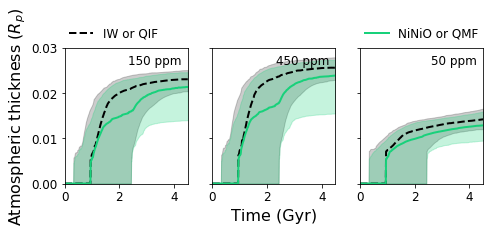

In [21]:
def plot_volatiles_time(X_CO2, X_H2O, var, mass, ylabel="", test_gauss=False,
                      redcolor='xkcd:black', oxicolor='xkcd:seaweed', lw=2):
    """Make subplots of 1-sigma time evolution for different initial volatile cases, given a planet mass

    Parameters
    ----------
    X_CO2 : array
        Inital co2 cases to plot
    X_H2O : array
        Initial h2o cases to plot
    var : str
        Name of parameter to plot on y-axis, as written in results tables
    mass : int (optional)
        The planet mass to consider
    ylabel : str (optional)
        Text label for y-axis
    test_gauss : boolean (optional)
        The parameter test_gauss in function ts_percentiles()
    redcolor : str (optional)
        Colour to plot reduced cases
    oxicolor : str (optional)
        Colour to plot oxidized cases
    lw : int (optional)
        Line width for matplotlib
           
    Returns
    -------
    fig : obj
        The figure object
    """
    ncols = len(X_CO2)
    nrows = 1
    fig = plt.figure(figsize=(ncols*2.5, nrows*2.5))
    
    # Set up big subplot to host shared axis labels
    bigax = fig.add_subplot(111)    
    bigax.spines['top'].set_color('none')
    bigax.spines['bottom'].set_color('none')
    bigax.spines['left'].set_color('none')
    bigax.spines['right'].set_color('none')
    bigax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

    for ii, xx in enumerate(X_H2O):
        H2O_0 = X_H2O[ii]
        CO2_0 = X_CO2[ii]

        z = int(str(nrows) + str(ncols) + str(ii+1))
        ax = fig.add_subplot(z)
        isleg=False
        if ii == 0: # only draw legend once
            isleg=True

        t_reduced, H_reduced = read_output(var, buffer='IW', M=mass, H2O_0=H2O_0, CO2_0=CO2_0) # reduced
        t_reduced, H_reduced = read_output(var, buffer='QIF', M=mass, H2O_0=H2O_0, CO2_0=CO2_0,
                                           append_to_time=t_reduced, append_to_H=H_reduced) # reduced
        t_oxidized, H_oxidized = read_output(var, buffer='QFM', M=mass, H2O_0=H2O_0, CO2_0=CO2_0) # oxidized
        t_oxidized, H_oxidized = read_output(var, buffer='NiNiO', M=mass,  H2O_0=H2O_0, CO2_0=CO2_0,
                                             append_to_time=t_reduced, append_to_H=H_reduced) # oxidized

        fig, ax = plot_1sigma_evol(t_reduced[0], H_reduced, 
                                   color=redcolor,
                                   #label='IW or QIF',
                                   alpha=0.2, lw=lw, ls='--',
                                   fig=fig, ax=ax, leg=False,
                                   test_gauss=test_gauss)
        fig, ax = plot_1sigma_evol(t_oxidized[0], H_oxidized, 
                                   color=oxicolor,
                                   legtitle=r'$\bf{Redox \; buffer}$', 
                                   #title=r'Planet mass = '+str(mass)+' $M_E$', 
                                   #label='NiNiO or QMF', 
                                   alpha=0.25,lw=lw,
                                   ticksize=12,  ylim=[0, 0.03],
                                   fig=fig, ax=ax, leg=False,
                                   test_gauss=test_gauss)
        if isleg:
            redline = Line2D([0], [0], color=redcolor, linewidth=lw, linestyle='--')
            oxiline = Line2D([0], [0], color=oxicolor, linewidth=lw, linestyle='-')
            lines = [redline, oxiline]
            labels = ['IW or QIF', 'NiNiO or QMF']
            bigax.legend(lines, labels, bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", fontsize=12,
                         frameon=False, borderaxespad=0.)
        if ii%ncols != 0:
            ax.tick_params(labelleft=False)  

        ax.text(0.95, 0.95, str(H2O_0)+' ppm', fontsize=12, 
                ha='right', va='top',
                transform=ax.transAxes)


    bigax.set_xlabel('Time (Gyr)', fontsize=16, labelpad=8)
    bigax.set_ylabel(ylabel, fontsize=16, labelpad=14)
    
    return fig

X_CO2 = [22, 50, 180]
X_H2O = [150, 450, 50]
fig = plot_volatiles_time(X_CO2, X_H2O, var='d_atm(Rp)', mass=w, ylabel=r'Atmospheric thickness ($R_p$)')
fig.savefig(figpath+'volatiles_thickness_evol.pdf', bbox_inches='tight')

In [ ]:
""" Plot thickness vs mass"""


# X_CO2 = [50, 22, 180]
# X_H2O = [450, 150, 50]
# masses = [1, 1.5, 2, 2.5, 3, 4, 5]

# # loop over volatile cases
# nrows=len(X_CO2)
# fig, axes = plt.subplots(nrows, 1, figsize=(4, 4*nrows)) # plt.subplots(1, len(X_CO2)+1, figsize=(17, 5)) 
# x=False
# y=True
# leg=True
# xlabel=''
# for ii, ax in enumerate(axes[0:3]):
#     if ii>0:
# #         y = False # turn off y ticks beyond leftmost subplot
#         leg = False # only show legend in first instance
#     if ii==nrows-1:
#         xlabel = 'Planet mass ($M_E$)'
#         x = True
#     if ii==1:
#         ylabel='Atmospheric thickness (km)'
#     else:
#         ylabel=''
#     fig, ax = plot_thickness_mass(masses, CO2_0=X_CO2[ii], H2O_0=X_H2O[ii], fig=fig, ax=ax, test=False,
# #                                   title=str(X_CO2[ii])+' ppm CO$_2$, '+str(X_H2O[ii])+' ppm H$_2$O', 
#                                   showx=x, showy=y, leg=leg, xlabel=xlabel, ylabelpad=10, ylabel=ylabel)
# # finally, show all cases
# # fig, axes[-1] = plot_thickness_mass(masses, fig=fig, ax=axes[-1], title='Min and max of all simulations', 
# #                                    showy=y, sigma=-1)

# # plt.tight_layout(pad=-1)
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.1)
# fig.savefig(figpath+'thickness_vs_mass_X.pdf', bbox_inches='tight')

In [ ]:
""" Plot partial pressures vs mass """


# X_CO2 = [50, 22, 180]
# X_H2O = [450, 150, 50]
# masses = [1, 1.5, 2, 2.5, 3, 4, 5]
# ylim = [[0, 100], [0, 100], [0, 100]] # [[0, 2e20], [0, 6e20], [0, 3e20]] 
# zorder_r = [[1, 1, 3],[2, 2, 4],[3, 3, 2],[4, 4, 1]] # by row, species
# zorder_o = [[1, 1, 2], [4, 4, 4], [2, 2, 1], [3, 3, 3]]
# fig, ax = plot_partialpressures_mass(masses, X_CO2, X_H2O, which='pressure', ylim=ylim, 
#                                      zorder_r=zorder_r, 
#                                      zorder_o=zorder_o, pickleto='pp_v_mass.pkl')
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.1)
# fig.savefig(figpath+'pressures_vs_mass.pdf', bbox_inches='tight')